# Load Library

In [2]:
import os
from pandas import DataFrame
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from itertools import repeat


import seaborn as sns
%matplotlib inline

# Data Preparation
## Input
List all summarized Gene Ontology summary from interproscan result. The data is FASTQ_GO_slim files from studies.

data should be extracted to folder "data"

In [5]:
file = []
for name in os.listdir("data"):
    if name.endswith("_FASTQ_GO_slim.csv"):
        file.append(name)
file

['MGYS00000518_FASTQ_GO_slim.csv',
 'MGYS00000520_FASTQ_GO_slim.csv',
 'MGYS00000604_FASTQ_GO_slim.csv',
 'MGYS00003598_FASTQ_GO_slim.csv',
 'MGYS00005034_FASTQ_GO_slim.csv',
 'MGYS00005098_FASTQ_GO_slim.csv',
 'MGYS00005101_FASTQ_GO_slim.csv',
 'MGYS00005102_FASTQ_GO_slim.csv']

## Merge GO_Slim data
Merge all data to single dataframe and extract target = study name \
Output: (1) Dataframe ("df_raw") and (2) target ("df_raw_target") 

In [3]:
# merge and extract target
for num, i in enumerate(file):
    if num == 0:
        df_raw = pd.read_csv(i)
        len_target = len(list(df_raw.columns)) - 3
        study=(list(repeat(i.replace('_FASTQ_GO_slim.csv',''), len_target)))
    else:
        df = pd.read_csv(i)
        len_target = len(list(df.columns)) - 3
        study = study + list(repeat(i.replace('_FASTQ_GO_slim.csv',''), len_target))
        df_raw = pd.merge(df_raw, df, on=['GO term','category','description'], how='left')
df_raw = df_raw.fillna(0)

# the target list for samples
sample = list(df_raw.drop(columns=["GO term", "category", "description"]).T.index)
study = [study, sample]
df_raw_target = pd.DataFrame(study, index=['Study', 'Sample']).T

In [4]:
# Raw Data containing reads of sequences found in metagenome related to GO pathways
df_raw.head(2)

,GO term,category,description,ERR981252,ERR981246,ERR981253,ERR981245,ERR981249,ERR981247,ERR981250,...,ERR2538416,ERR2538514,ERR2538521,ERR2538374,ERR2538492,ERR2538358,ERR2538371,ERR2538458,ERR2538426,ERR2538373
0,GO:0030031,biological_process,cell projection assembly,0,0,1,10,10,39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GO:0071554,biological_process,cell wall organization or biogenesis,1062,674,259,1037,2399,2030,131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_raw_target.head(2)

,Study,Sample
0,MGYS00000518,ERR981252
1,MGYS00000518,ERR981246


## Write Output

In [6]:
# Export raw data to csv
if not os.path.exists('output'):
    os.mkdir('my_folder')
df_raw.to_csv("./output/df_raw.csv")
df_raw_target.to_csv("./output/df_raw_target.csv")

# Exploratory Data Analysis
## Sort by Sum of Feature

In [7]:
#plt.figure(figsize = (20,10))
#sns.heatmap(df_raw.drop(columns=['GO term','category']).set_index('description'))

In [8]:
x = df_raw.set_index(['GO term', 'category', 'description'])
x.index.get_level_values(0)
df_raw.drop(columns='category')

,GO term,description,ERR981252,ERR981246,ERR981253,ERR981245,ERR981249,ERR981247,ERR981250,ERR981248,...,ERR2538416,ERR2538514,ERR2538521,ERR2538374,ERR2538492,ERR2538358,ERR2538371,ERR2538458,ERR2538426,ERR2538373
0,GO:0030031,cell projection assembly,0,0,1,10,10,39,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GO:0071554,cell wall organization or biogenesis,1062,674,259,1037,2399,2030,131,155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GO:0016043,cellular component organization,3739,40735,8309,34477,8081,58626,445,599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GO:0051301,cell division,1166,4859,39,894,4467,2385,236,295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GO:0016049,cell growth,0,0,0,201,7,133,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,GO:0000988,protein binding transcription factor activity,1835,5222,306,756,5472,2229,226,498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,GO:0004872,receptor activity,5269,38163,1938,12234,6795,19313,1086,1266,...,11221.0,12945.0,3976.0,28140.0,8211.0,14442.0,23010.0,10174.0,2454.0,27674.0
113,GO:0045182,translation regulator activity,0,0,0,0,8,3,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,GO:0005215,transporter activity,38988,74178,6009,29484,96470,59812,4610,5452,...,272070.0,198992.0,74168.0,509537.0,115387.0,245378.0,378325.0,170012.0,22459.0,509357.0


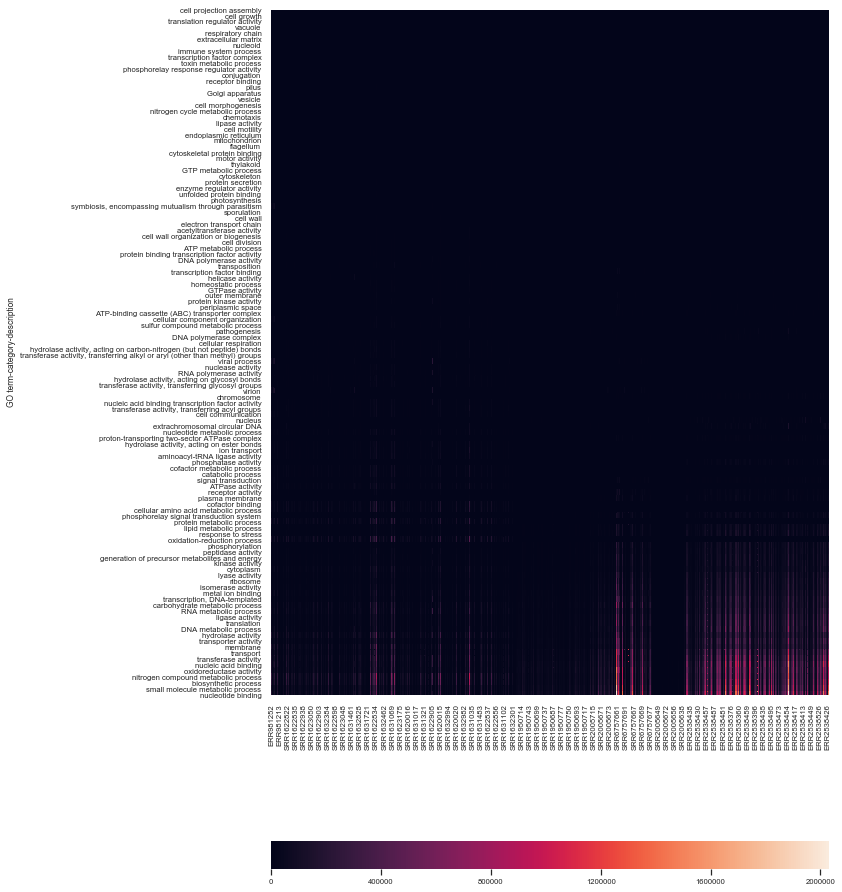

In [9]:
# Sum feature
#df_raw_sorted = df_raw.drop(columns=['category'])
df_raw_sorted = df_raw.set_index(['GO term', 'category', 'description'])
df_raw_sorted['total'] = df_raw_sorted.sum(axis=1)
df_raw_sorted['total'] = df_raw_sorted['total']/(len(df_raw.index))

# Sort feature by sum of numbers
df_raw_sorted = df_raw_sorted.sort_values('total', ascending=True)
df_raw_sorted = df_raw_sorted.drop(columns=['total'])
#df_raw_sorted.head(2)

plt.figure(figsize = (10,18))
sns.set(font_scale=0.7) 
#sns.set_context("paper")
sns.heatmap(df_raw_sorted, 
            yticklabels=df_raw_sorted.index.get_level_values(2),
           cbar_kws={"orientation": "horizontal"})

# Preprocessing

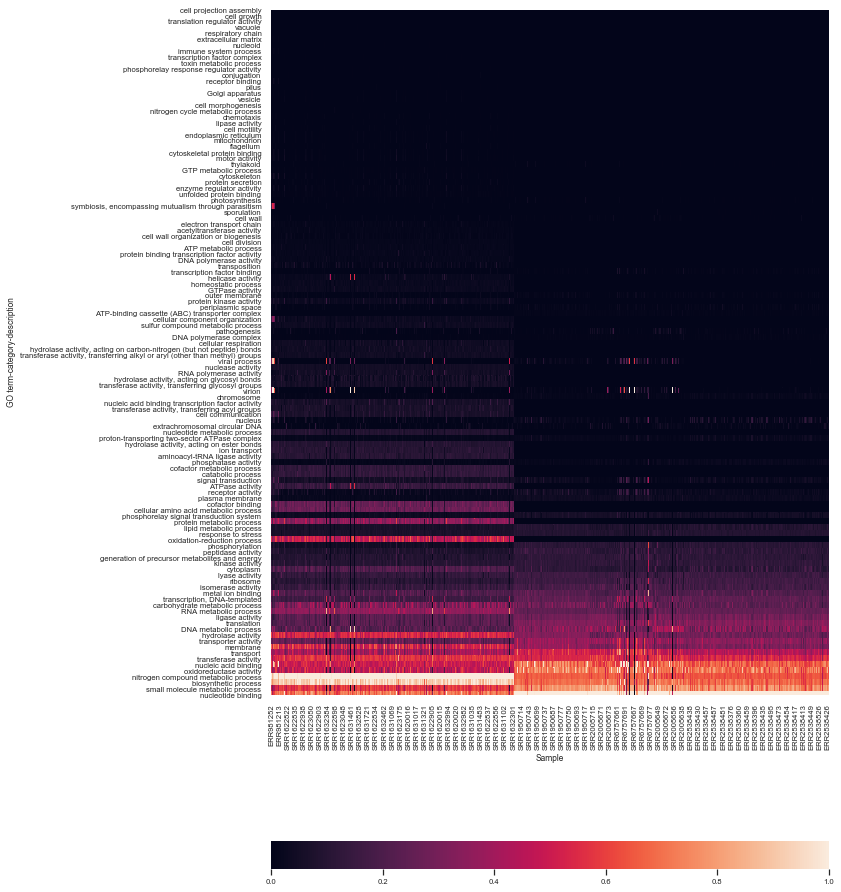

In [10]:
# normalizing by MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df_raw_sorted)
df_norm_minmax = pd.DataFrame(scaled_array, columns=df_raw_target.Sample, index=df_raw_sorted.index)
plt.figure(figsize = (10,18))
sns.set(font_scale=0.7) 
sns.heatmap(df_norm_minmax,
           yticklabels=df_raw_sorted.index.get_level_values(2),
           cbar_kws={"orientation": "horizontal"})

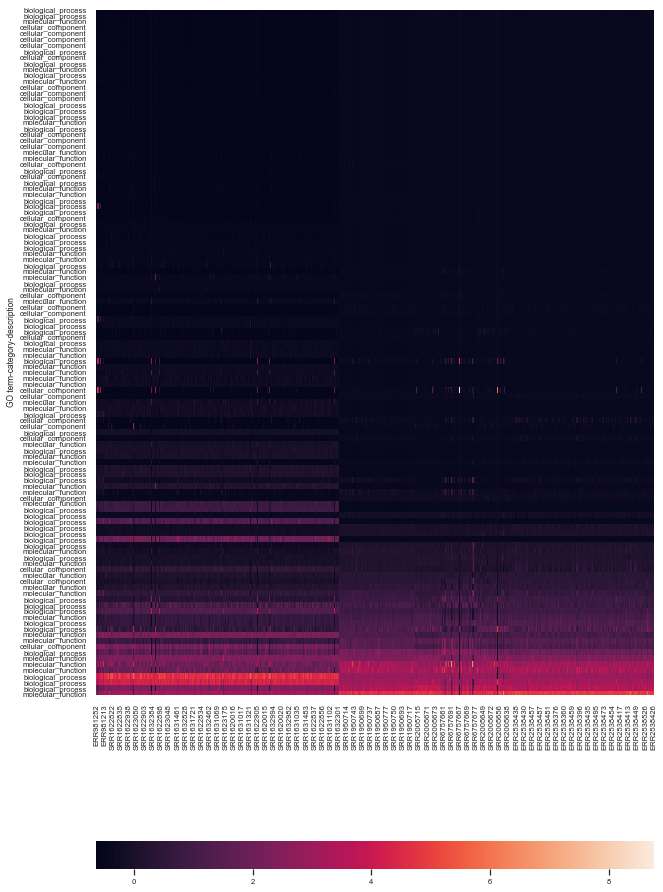

In [20]:
from scipy.stats import zscore
df_norm_zscore = df_raw_sorted.apply(zscore)

plt.figure(figsize = (10,18))
sns.set(font_scale=0.7) 
sns.heatmap(df_norm_zscore,
           yticklabels=df_norm_zscore.index.get_level_values(1),
           cbar_kws={"orientation": "horizontal"})

## Prepare Feature for Machine Learning

In [12]:
data = df_norm_minmax.T
data.head(2)

GO term,GO:0030031,GO:0016049,GO:0045182,GO:0005773,GO:0070469,GO:0031012,GO:0009295,GO:0002376,GO:0005667,GO:0009404,...,GO:0005215,GO:0016020,GO:0006810,GO:0016740,GO:0003676,GO:0016491,GO:0006807,GO:0009058,GO:0044281,GO:0000166
category,biological_process,biological_process,molecular_function,cellular_component,cellular_component,cellular_component,cellular_component,biological_process,cellular_component,biological_process,...,molecular_function,cellular_component,biological_process,molecular_function,molecular_function,molecular_function,biological_process,biological_process,biological_process,molecular_function
description,cell projection assembly,cell growth,translation regulator activity,vacuole,respiratory chain,extracellular matrix,nucleoid,immune system process,transcription factor complex,toxin metabolic process,...,transporter activity,membrane,transport,transferase activity,nucleic acid binding,oxidoreductase activity,nitrogen compound metabolic process,biosynthetic process,small molecule metabolic process,nucleotide binding
Sample,,,,,,,,,,,,,,,,,,,,,
ERR981252,0.0,0.0,0.0,0.0,0.000000,0.000588,0.00095,0.000185,0.000000,0.000233,...,0.313825,0.617089,0.484163,0.580078,0.578404,0.606713,1.0,0.893967,0.538842,0.669618
ERR981246,0.0,0.0,0.0,0.0,0.001276,0.000600,0.00000,0.001712,0.000003,0.000000,...,0.258589,0.696713,0.435022,0.556800,0.602600,0.556298,1.0,0.883304,0.507340,0.729370


In [17]:
eda = data.describe()
dropfeature = []
for i in range(116):
    x = eda.iloc[:,i]
    if x['25%'] == x['50%'] == 0:
    #if x['25%'] == 0:
        #print(x.name, x['25%'], x['50%'], x['75%'])
        dropfeature.append(str(x.name))
len(dropfeature)
data = data.drop(index = dropfeature)

KeyError: '["(\'GO:0030031\', \'biological_process\', \'cell projection assembly\')"\n "(\'GO:0016049\', \'biological_process\', \'cell growth\')"\n "(\'GO:0045182\', \'molecular_function\', \'translation regulator activity\')"\n "(\'GO:0005773\', \'cellular_component\', \'vacuole\')"\n "(\'GO:0070469\', \'cellular_component\', \'respiratory chain\')"\n "(\'GO:0031012\', \'cellular_component\', \'extracellular matrix\')"\n "(\'GO:0009295\', \'cellular_component\', \'nucleoid\')"\n "(\'GO:0002376\', \'biological_process\', \'immune system process\')"\n "(\'GO:0005667\', \'cellular_component\', \'transcription factor complex\')"\n "(\'GO:0009404\', \'biological_process\', \'toxin metabolic process\')"\n "(\'GO:0000156\', \'molecular_function\', \'phosphorelay response regulator activity\')"\n "(\'GO:0000746\', \'biological_process\', \'conjugation\')"\n "(\'GO:0005102\', \'molecular_function\', \'receptor binding\')"\n "(\'GO:0009289\', \'cellular_component\', \'pilus\')"\n "(\'GO:0005794\', \'cellular_component\', \'Golgi apparatus\')"\n "(\'GO:0031982\', \'cellular_component\', \'vesicle\')"\n "(\'GO:0000902\', \'biological_process\', \'cell morphogenesis\')"\n "(\'GO:0071941\', \'biological_process\', \'nitrogen cycle metabolic process\')"\n "(\'GO:0006935\', \'biological_process\', \'chemotaxis\')"\n "(\'GO:0016298\', \'molecular_function\', \'lipase activity\')"\n "(\'GO:0048870\', \'biological_process\', \'cell motility\')"\n "(\'GO:0005783\', \'cellular_component\', \'endoplasmic reticulum\')"\n "(\'GO:0005739\', \'cellular_component\', \'mitochondrion\')"\n "(\'GO:0019861\', \'cellular_component\', \'flagellum\')"\n "(\'GO:0008092\', \'molecular_function\', \'cytoskeletal protein binding\')"\n "(\'GO:0003774\', \'molecular_function\', \'motor activity\')"\n "(\'GO:0046039\', \'biological_process\', \'GTP metabolic process\')"\n "(\'GO:0005856\', \'cellular_component\', \'cytoskeleton\')"\n "(\'GO:0009306\', \'biological_process\', \'protein secretion\')"\n "(\'GO:0030234\', \'molecular_function\', \'enzyme regulator activity\')"\n "(\'GO:0051082\', \'molecular_function\', \'unfolded protein binding\')"\n "(\'GO:0044403\', \'biological_process\', \'symbiosis, encompassing mutualism through parasitism\')"\n "(\'GO:0022900\', \'biological_process\', \'electron transport chain\')"\n "(\'GO:0016407\', \'molecular_function\', \'acetyltransferase activity\')"\n "(\'GO:0071554\', \'biological_process\', \'cell wall organization or biogenesis\')"\n "(\'GO:0051301\', \'biological_process\', \'cell division\')"\n "(\'GO:0046034\', \'biological_process\', \'ATP metabolic process\')"\n "(\'GO:0000988\', \'molecular_function\', \'protein binding transcription factor activity\')"\n "(\'GO:0034061\', \'molecular_function\', \'DNA polymerase activity\')"\n "(\'GO:0032196\', \'biological_process\', \'transposition\')"\n "(\'GO:0004386\', \'molecular_function\', \'helicase activity\')"\n "(\'GO:0042592\', \'biological_process\', \'homeostatic process\')"\n "(\'GO:0003924\', \'molecular_function\', \'GTPase activity\')"\n "(\'GO:0004672\', \'molecular_function\', \'protein kinase activity\')"\n "(\'GO:0016043\', \'biological_process\', \'cellular component organization\')"\n "(\'GO:0006790\', \'biological_process\', \'sulfur compound metabolic process\')"\n "(\'GO:0045333\', \'biological_process\', \'cellular respiration\')"\n "(\'GO:0016810\', \'molecular_function\', \'hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds\')"\n "(\'GO:0016765\', \'molecular_function\', \'transferase activity, transferring alkyl or aryl (other than methyl) groups\')"\n "(\'GO:0004518\', \'molecular_function\', \'nuclease activity\')"\n "(\'GO:0034062\', \'molecular_function\', \'RNA polymerase activity\')"\n "(\'GO:0016798\', \'molecular_function\', \'hydrolase activity, acting on glycosyl bonds\')"\n "(\'GO:0016757\', \'molecular_function\', \'transferase activity, transferring glycosyl groups\')"\n "(\'GO:0001071\', \'molecular_function\', \'nucleic acid binding transcription factor activity\')"\n "(\'GO:0016746\', \'molecular_function\', \'transferase activity, transferring acyl groups\')"\n "(\'GO:0007154\', \'biological_process\', \'cell communication\')"\n "(\'GO:0009117\', \'biological_process\', \'nucleotide metabolic process\')"\n "(\'GO:0016788\', \'molecular_function\', \'hydrolase activity, acting on ester bonds\')"\n "(\'GO:0006811\', \'biological_process\', \'ion transport\')"\n "(\'GO:0004812\', \'molecular_function\', \'aminoacyl-tRNA ligase activity\')"\n "(\'GO:0051186\', \'biological_process\', \'cofactor metabolic process\')"\n "(\'GO:0009056\', \'biological_process\', \'catabolic process\')"\n "(\'GO:0016887\', \'molecular_function\', \'ATPase activity\')"\n "(\'GO:0048037\', \'molecular_function\', \'cofactor binding\')"\n "(\'GO:0006520\', \'biological_process\', \'cellular amino acid metabolic process\')"\n "(\'GO:0019538\', \'biological_process\', \'protein metabolic process\')"\n "(\'GO:0055114\', \'biological_process\', \'oxidation-reduction process\')"] not found in axis'

In [ ]:
data = data.groupby(level=0).mean()

In [ ]:
plt.figure(figsize = (8,16))
sns.heatmap(data.T)

In [ ]:
#target
#y = {'target': data.index.values}
y = {'target': study}

#feature
x = data.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis=1)
finalDf

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf.target.unique()
colors = ['b', 'w', 'r', 'c', 'm', 'y', 'k', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha=0.5)
ax.legend(targets)
ax.grid()
#bg_color = 'grey'
#ax.patch.set_facecolor(bg_color)

plt.show()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_zlabel('Principal Component 3', fontsize = 8)
ax.set_title('3 component PCA', fontsize = 20)
targets = finalDf.target.unique()
colors = ['b', 'w', 'r', 'c', 'm', 'y', 'k', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50
               , alpha=0.3)
ax.legend(targets)
ax.grid()
#bg_color = 'grey'
#ax.patch.set_facecolor(bg_color)

plt.show()